Missing Values:
Date                        0
Coffee Type                62
Coffee Number               0
Caffeine Amount (mg)        5
Course Load (min)           0
Exam Number (that week)     0

[EDA] Daily Coffee Consumption Over Time


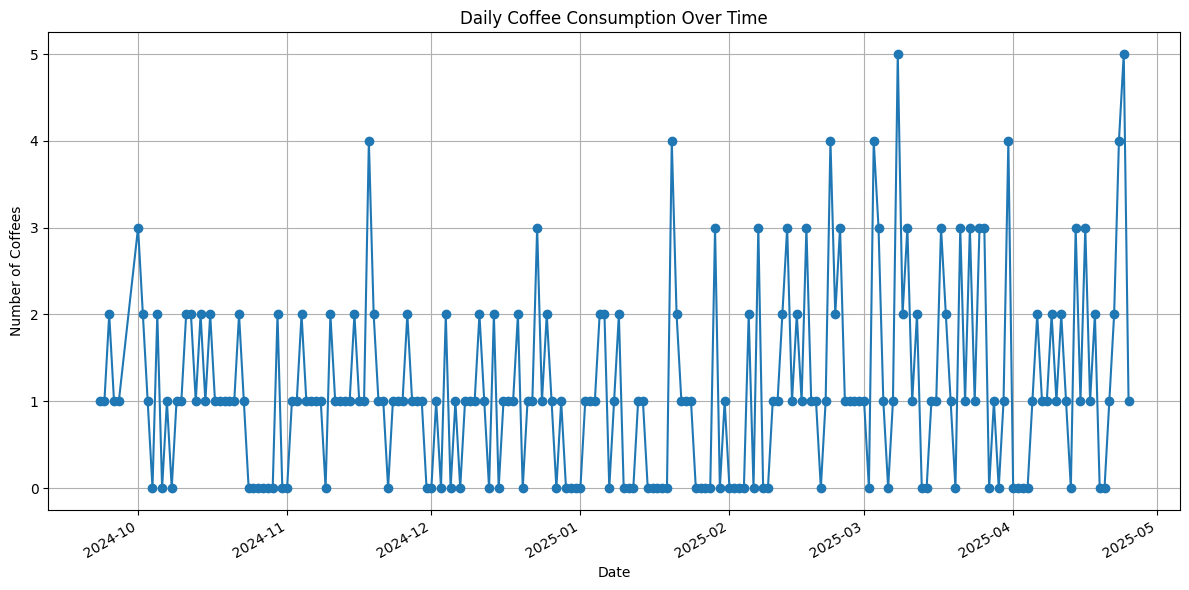


[EDA] Average Coffee Consumption - Exam vs Normal Week


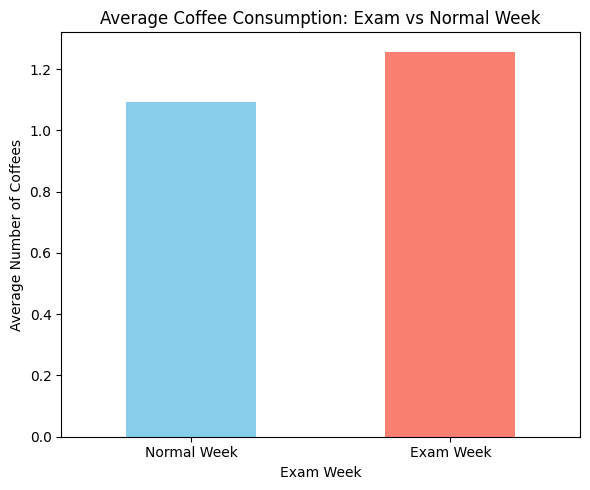


[EDA] Coffee Consumption by Course Load Category


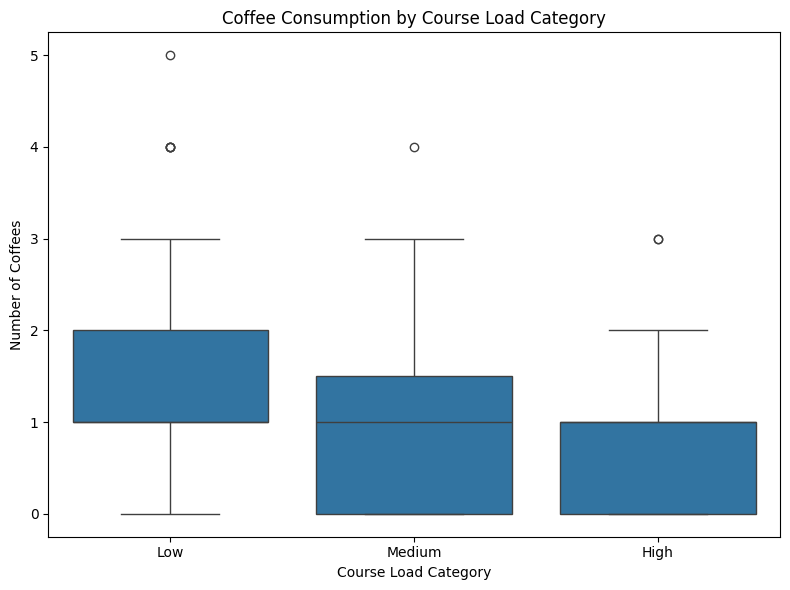


[EDA] Correlation Heatmap


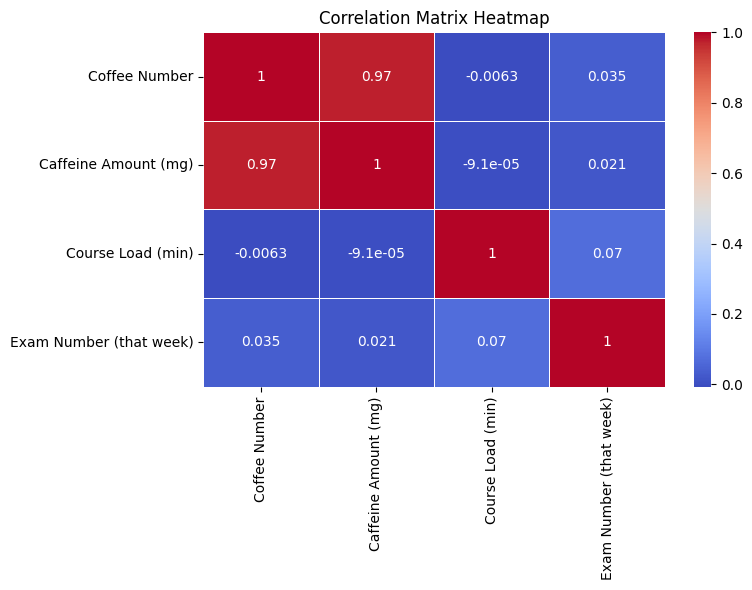


[EDA] Weekly Average Coffee Consumption


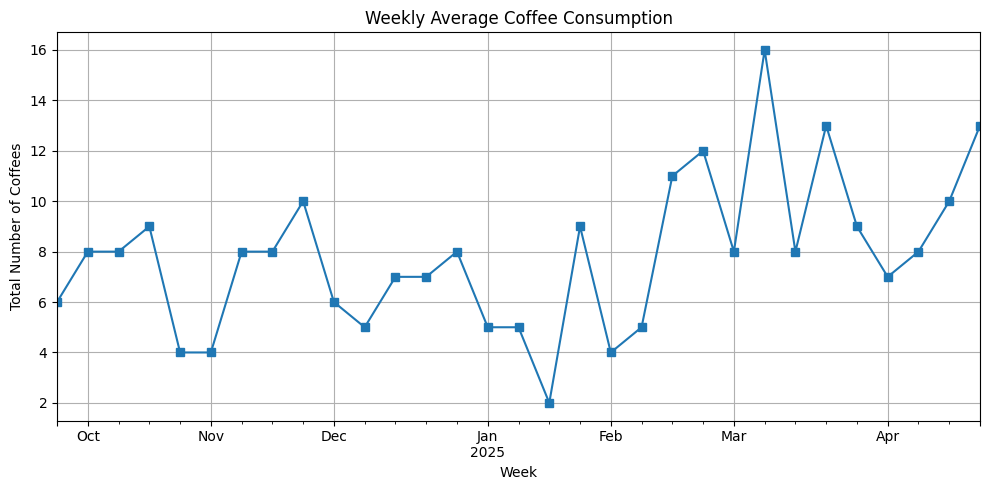


[Hypothesis Test 1] Exam Week vs Normal Week
T-Test Result: TtestResult(statistic=np.float64(1.1164035835445671), pvalue=np.float64(0.2659391456796988), df=np.float64(158.48682820832025))
❌ No significant difference between exam and non-exam weeks.

[Hypothesis Test 2] Course Load Categories
ANOVA Result: F_onewayResult(statistic=np.float64(3.092139704178712), pvalue=np.float64(0.0486352684415857))
✅ Significant difference: Course load affects coffee consumption.

[Note] Explanation of Missing Weeks in Weekly Graph:
Some weeks in the weekly graph have 0 coffee consumption, meaning no coffee was consumed during those weeks.
This is a valid behavioral finding rather than a data collection issue.

[ML] Linear Regression Model – Predicting Coffee Consumption
Features used: ['Course Load (min)', 'Exam Number (that week)', 'DayOfWeek']
Mean Squared Error: 1.690
R² Score: -0.177


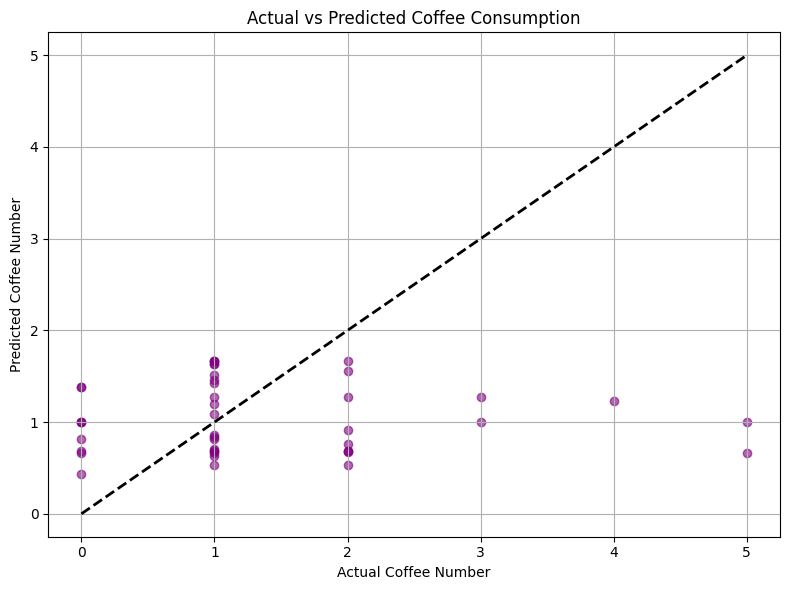

In [ ]:
# DSA210 Term Project
# Starbucks Coffee Consumption Analysis
# Author: Zeynep Bilici
# Goal: Analyze coffee consumption patterns based on course load and exam weeks

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Data File
# ----------------------
file_path = 'DSA210 Zeynep:data.xlsx'
df = pd.read_excel(file_path, sheet_name=0, header=1)
df.columns = df.columns.str.strip()

# Step 2: Data Cleaning
# ---------------------
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
numeric_columns = ['Coffee Number', 'Caffeine Amount (mg)', 'Course Load (min)', 'Exam Number (that week)']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Missing Values:")
print(df.isnull().sum().to_string())


# Step 3: Exploratory Data Analysis (EDA)
# ---------------------------------------
print("\n[EDA] Daily Coffee Consumption Over Time")
daily_consumption = df.groupby('Date')['Coffee Number'].sum()
plt.figure(figsize=(12,6))
daily_consumption.plot(marker='o')
plt.title('Daily Coffee Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Coffees')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n[EDA] Average Coffee Consumption - Exam vs Normal Week")
df['Exam Week'] = df['Exam Number (that week)'] > 0
avg_consumption_exam = df.groupby('Exam Week')['Coffee Number'].mean()
plt.figure(figsize=(6,5))
avg_consumption_exam.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Coffee Consumption: Exam vs Normal Week')
plt.xlabel('Exam Week')
plt.ylabel('Average Number of Coffees')
plt.xticks(ticks=[0,1], labels=['Normal Week', 'Exam Week'], rotation=0)
plt.tight_layout()
plt.show()

bins = [0, 150, 300, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Course Load Category'] = pd.cut(df['Course Load (min)'], bins=bins, labels=labels)
print("\n[EDA] Coffee Consumption by Course Load Category")
plt.figure(figsize=(8,6))
sns.boxplot(x='Course Load Category', y='Coffee Number', data=df)
plt.title('Coffee Consumption by Course Load Category')
plt.xlabel('Course Load Category')
plt.ylabel('Number of Coffees')
plt.tight_layout()
plt.show()

print("\n[EDA] Correlation Heatmap")
corr_matrix = df[['Coffee Number', 'Caffeine Amount (mg)', 'Course Load (min)', 'Exam Number (that week)']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

print("\n[EDA] Weekly Average Coffee Consumption")
df.set_index('Date', inplace=True)
weekly_consumption = df['Coffee Number'].resample('W').sum()
plt.figure(figsize=(10,5))
weekly_consumption.plot(marker='s')
plt.title('Weekly Average Coffee Consumption')
plt.xlabel('Week')
plt.ylabel('Total Number of Coffees')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Hypothesis Testing
# ---------------------------
print("\n[Hypothesis Test 1] Exam Week vs Normal Week")
exam_week = df[df['Exam Week'] == True]['Coffee Number']
normal_week = df[df['Exam Week'] == False]['Coffee Number']
exam_ttest_result = stats.ttest_ind(exam_week.dropna(), normal_week.dropna(), equal_var=False)
print("T-Test Result:", exam_ttest_result)
if exam_ttest_result.pvalue < 0.05:
    print("\u2705 Significant difference: Students consume more coffee during exam weeks.")
else:
    print("\u274C No significant difference between exam and non-exam weeks.")

print("\n[Hypothesis Test 2] Course Load Categories")
groups = [group['Coffee Number'].dropna() for _, group in df.groupby('Course Load Category', observed=True)]
anova_result = stats.f_oneway(*groups)
print("ANOVA Result:", anova_result)
if anova_result.pvalue < 0.05:
    print("\u2705 Significant difference: Course load affects coffee consumption.")
else:
    print("\u274C No significant difference in coffee consumption across course load categories.")

print("\n[Note] Explanation of Missing Weeks in Weekly Graph:")
print("Some weeks in the weekly graph have 0 coffee consumption, meaning no coffee was consumed during those weeks.\nThis is a valid behavioral finding rather than a data collection issue.")

# Step 5: Machine Learning – Predict Coffee Consumption
# ------------------------------------------------------
print("\n[ML] Linear Regression Model – Predicting Coffee Consumption")
df_ml = df.reset_index()
df_ml['DayOfWeek'] = df_ml['Date'].dt.dayofweek

X = df_ml[['Course Load (min)', 'Exam Number (that week)', 'DayOfWeek']].dropna()
y = df_ml['Coffee Number'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Features used:", X.columns.tolist())
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Coffee Number")
plt.ylabel("Predicted Coffee Number")
plt.title("Actual vs Predicted Coffee Consumption")
plt.grid(True)
plt.tight_layout()
plt.show()